<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook/lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 1-1. Digital Image Fundamentals, Intensity Transformations

In [1]:
path0 = 'your path'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

### Representating Digital Images

In [3]:
I = Image.open(path0+'rose.tif')
print(I.format, I.size, I.mode)
IM = np.array(I)

TIFF (1600, 1754) L


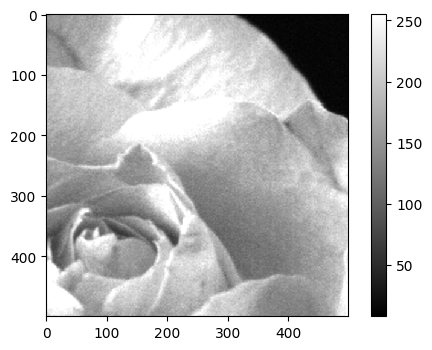

In [33]:
plt.figure(dpi=100)
plt.imshow(IM[200:700,800:1300], cmap = 'gray',interpolation='nearest')
#plt.axis('off')
plt.colorbar()
plt.show()

### Spatial Resolution

In [32]:
I = Image.open(path0+'Chronometer.tif')
#I

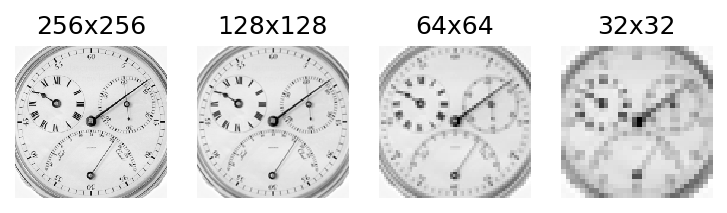

In [6]:
plt.figure(dpi=150)
plt.subplot(1,4,1)
plt.imshow(I.resize((256,256)),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('256x256')
plt.subplot(1,4,2)
plt.imshow(I.resize((128,128)),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('128x128')
plt.subplot(1,4,3)
plt.imshow(I.resize((64,64)),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('64x64')
plt.subplot(1,4,4)
plt.imshow(I.resize((32,32)),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('32x32')
plt.show()

### Image Interpolation

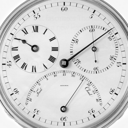

In [7]:
N=128
I0 = I.resize((N,N))
I0

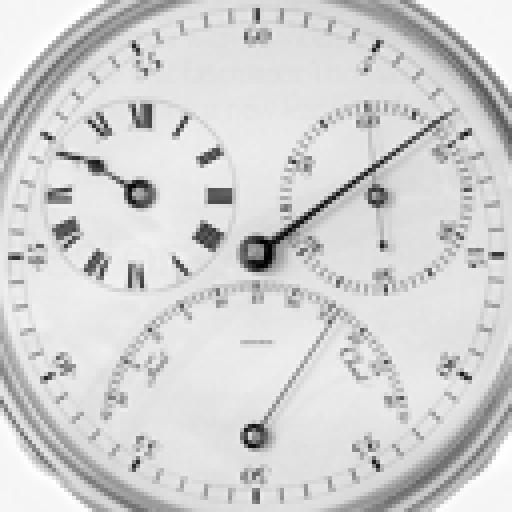

In [8]:
N=512
I1 = I0.resize((N,N),resample=Image.NEAREST)
I1

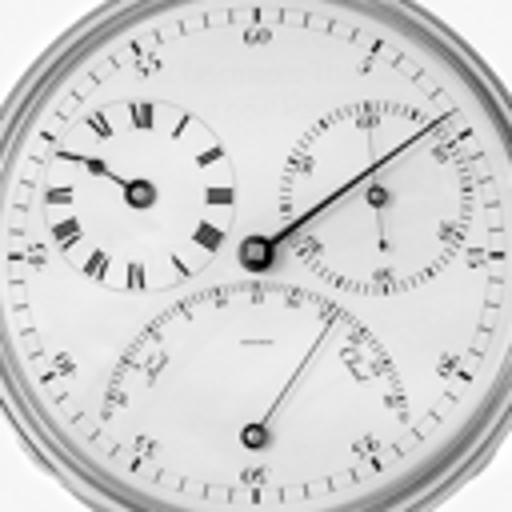

In [9]:
N=512
I2 = I0.resize((N,N),resample=Image.BICUBIC)
I2

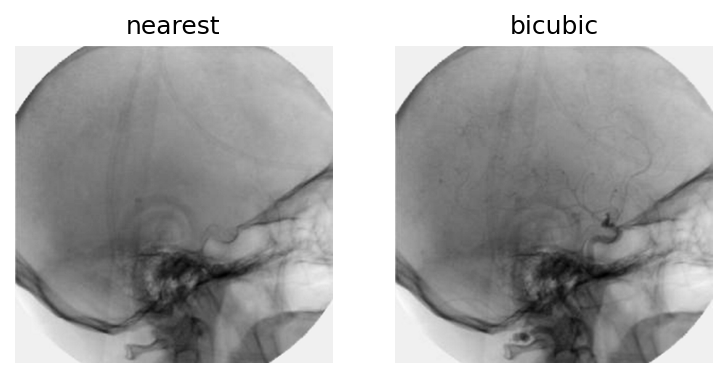

In [34]:
plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(I1,cmap='gray')
plt.axis('off')
plt.title('nearest')
plt.subplot(1,2,2)
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.title('bicubic')
plt.show()

### Image Addition (Averaging)

(566, 598)


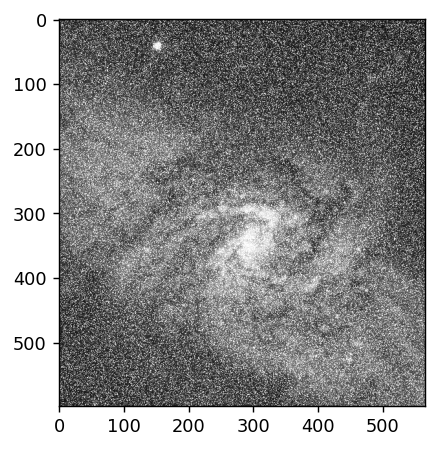

In [35]:
I = Image.open(path0+'noisygalaxy/galaxy001.tif')
print(I.size)
plt.figure(dpi=128)
plt.imshow(I,cmap='gray')
plt.show()

In [12]:
flist = os.listdir(path0+'noisygalaxy')
flist[3:8]

['galaxy051.tif',
 'galaxy052.tif',
 'galaxy045.tif',
 'galaxy047.tif',
 'galaxy054.tif']

In [13]:
len(flist)

64

In [14]:
Ik = np.zeros((len(flist),I.size[1],I.size[0]))
for n in range(0,len(flist)):
  Ik[n] = Image.open(path0+'noisygalaxy/'+flist[n])

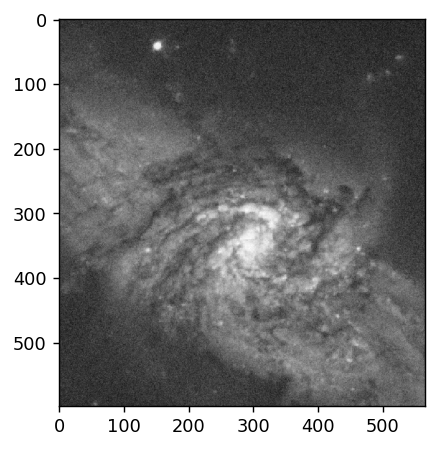

In [36]:
plt.figure(dpi=128)
N = len(flist)
plt.imshow(np.mean(Ik[:N],axis=0),cmap='gray')
plt.show()

### Image Subtraction

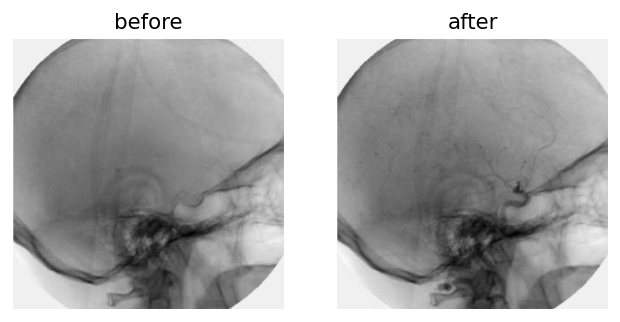

In [37]:
I1 = Image.open(path0+'angiography-mask-image.tif')
I2 = Image.open(path0+'angiography-live-image.tif')

plt.figure(dpi=128)
plt.subplot(1,2,1)
plt.imshow(I1,cmap='gray')
plt.axis('off')
plt.title('before')
plt.subplot(1,2,2)
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.title('after')
plt.show()

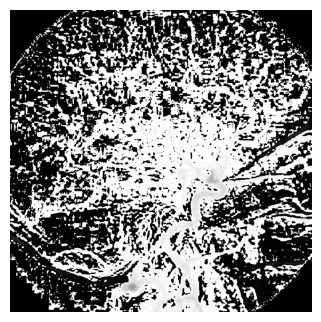

In [38]:
I_diff_uint = Image.fromarray(np.asarray(I2) - np.asarray(I1))
plt.figure(dpi=100)
plt.imshow(I_diff_uint,cmap='gray')
plt.axis('off')
plt.show()

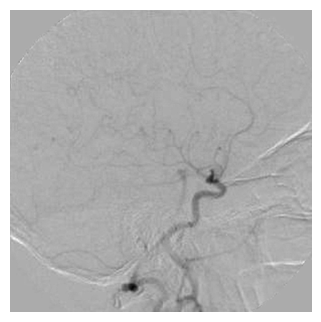

In [39]:
I_diff_int = np.asarray(I2).astype(int) - np.asarray(I1).astype(int)
plt.figure(dpi=100)
plt.imshow(I_diff_int,cmap='gray')
plt.axis('off')
plt.show()

### Single-Pixel Operation

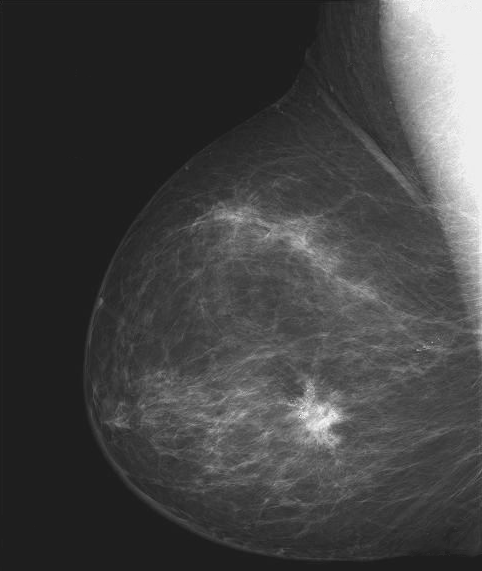

In [19]:
I = Image.open(path0+'breastXray.tif')
I

In [20]:
np.max(I)

255

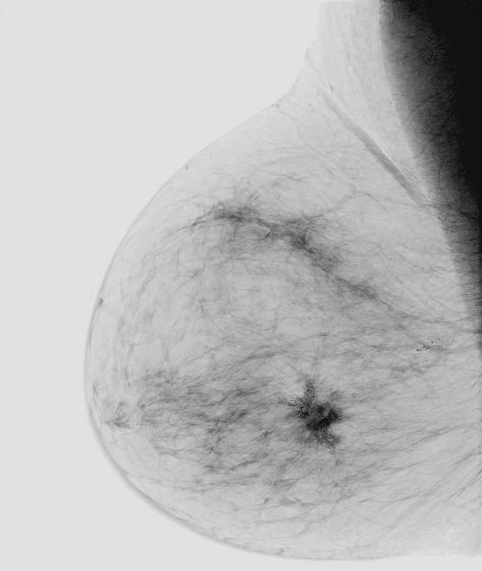

In [21]:
I_inv = Image.fromarray(255 - np.asarray(I))
I_inv

### Geometric transformation: 
- Affine Transformations

In [22]:
import torchvision.transforms.functional as ttf

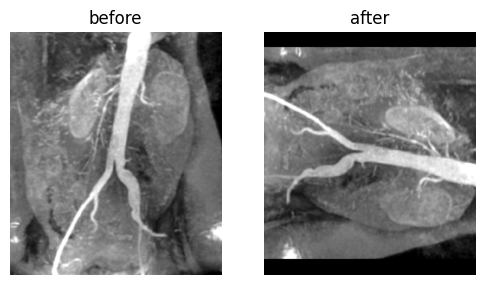

In [40]:
I = Image.open(path0+'angiogram-aortic-kidney.tif')
I_ = ttf.affine(I,angle=90, translate=(0,0),scale=1,shear=0,resample=Image.BICUBIC)
plt.figure(dpi=100)
plt.subplot(1,2,1)
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.title('before')
plt.subplot(1,2,2)
plt.imshow(I_,cmap='gray')
plt.axis('off')
plt.title('after')
plt.show()

### Histogram Equalization

In [24]:
from PIL import ImageOps

(500, 500)


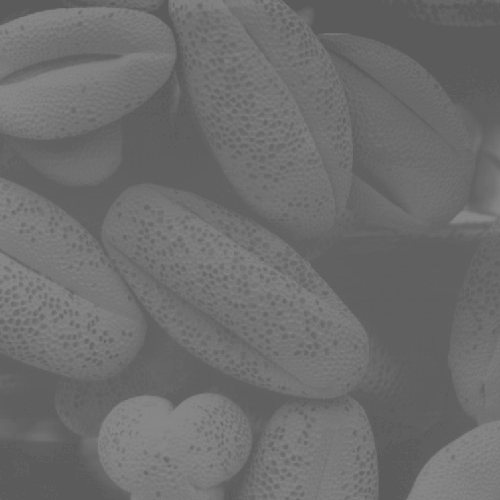

In [25]:
I = Image.open(path0+'pollen-lowcontrast.tif')
print(I.size)
I

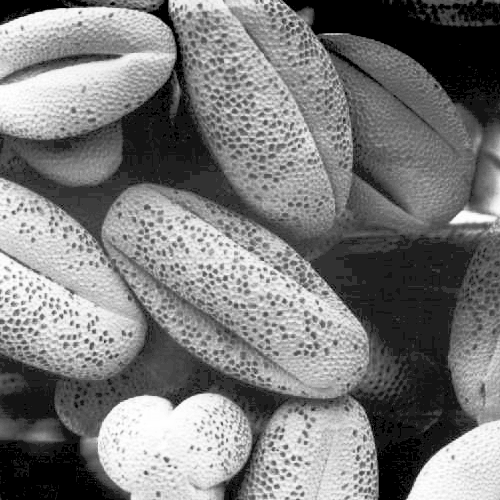

In [26]:
I_eq = ImageOps.equalize(I)
I_eq

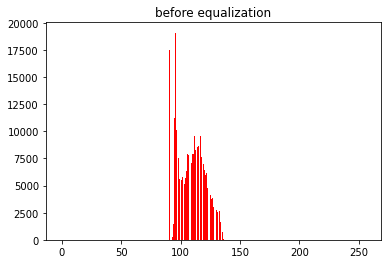

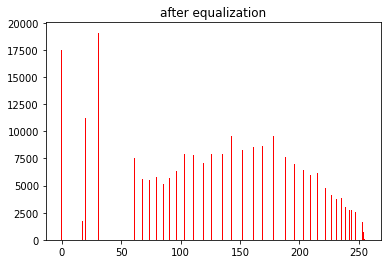

In [27]:
hist = I.histogram()
hist_eq = I_eq.histogram()

for n in range(0,len(hist)):
  plt.bar(n,hist[n],color='r')

plt.title('before equalization')
plt.show()


for n in range(0,len(hist_eq)):
  plt.bar(n,hist_eq[n],color='r')

plt.title('after equalization')
plt.show()

### Histogram Equalization using Mask

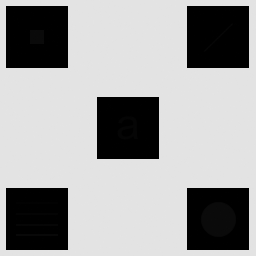

In [28]:
I = Image.open(path0+'hidden-symbols.tif')
I

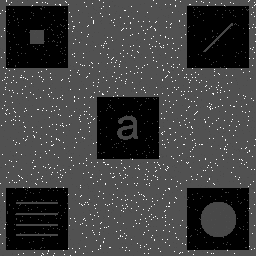

In [29]:
I_eq = ImageOps.equalize(I)
I_eq

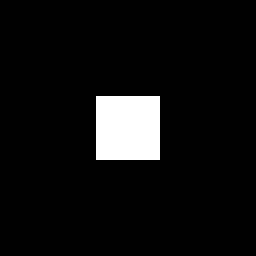

In [30]:
tmp = np.zeros(I.size)
tmp[96:-96,96:-96] =255
mask = Image.fromarray(np.uint8(tmp))
mask

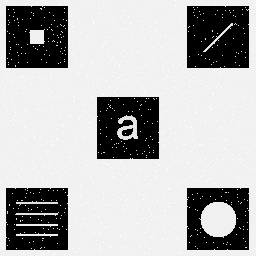

In [31]:
I_eq_mask = ImageOps.equalize(I,mask)
I_eq_mask